In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
# carrega dados brutos csv para dataframe pandas
RAW_df_day = pd.read_csv("day.csv")

In [133]:
# dataframe contendo dados diários do período de 2 anos
RAW_df_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.20,0.23,0.52,0.09,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.20,0.21,0.50,0.17,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.17,0.16,0.54,0.27,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.14,0.12,0.43,0.36,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.15,0.15,0.48,0.22,41,1280,1321


# Exploratory Data Analysis

In [134]:
# o README original do dataset informa que a temperatura está normalizada pelo valor maximo de 41 graus celsius, porém
# esse valor (1.0 no dado normalizado) está ausente. Possivelmente temos um subset.
RAW_df_day.loc[RAW_df_day['temp'] == RAW_df_day['temp'].max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
553,554,2012-07-07,3,1,7,0,6,0,1,0.86,0.80,0.49,0.16,1448,3392,4840


In [135]:
# shape do dataframe
RAW_df_day.shape

(731, 16)

In [136]:
# tipos dos dados
RAW_df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [137]:
# desconsidera a coluna windspeed, pois falta a unidade física na fonte
df_day = RAW_df_day.drop(columns="windspeed")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,82,1518,1600


In [138]:
# conta valores NULL ou NA
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
casual        0
registered    0
cnt           0
dtype: int64

In [139]:
# confere se valores únicos estão de acordo com o proposto no problema
" \
seasons: {}, \
years: {}, \
months: {}, \
holidays: {}, \
weekdays: {}, \
workingdays: {}, \
weathersits: {}" \
.format(
df_day['season'].nunique(),
df_day['yr'].nunique(),
df_day['mnth'].nunique(),
df_day['holiday'].nunique(),
df_day['weekday'].nunique(),
df_day['workingday'].nunique(),
df_day['weathersit'].nunique()
)

' seasons: 4, years: 2, months: 12, holidays: 2, weekdays: 7, workingdays: 2, weathersits: 3'

Há apenas 3 valores de season, possivelmente não ocorreu um dos 4 eventos climáticos

In [140]:
# desnormaliza as colunas pelo seu valor máximo declarado, usando 2 casas decimais
df_day["temp"] = (df_day["temp"] * 41).round(2)
df_day["atemp"] = (df_day["atemp"] * 50).round(2)
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.11,18.18,0.81,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.90,17.69,0.70,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.05,9.47,0.44,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.20,10.61,0.59,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.31,11.46,0.44,82,1518,1600


In [141]:
# modifica umidade para 2 casas decimais, mas mantém normalização;
df_day["hum"] = df_day["hum"].round(2)
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.11,18.18,0.81,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.90,17.69,0.70,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.05,9.47,0.44,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.20,10.61,0.59,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.31,11.46,0.44,82,1518,1600


In [142]:
# amostra aleatória do dataset para análise superficial
df_day.sample(8)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
699,700,2012-11-30,4,1,11,0,5,1,1,12.23,16.19,0.65,362,5306,5668
117,118,2011-04-28,2,0,4,0,4,1,2,25.32,28.95,0.70,569,3489,4058
176,177,2011-06-26,3,0,6,0,0,0,1,27.88,31.88,0.51,1920,3385,5305
371,372,2012-01-07,1,1,1,0,6,0,1,16.13,19.54,0.53,1070,3451,4521
219,220,2011-08-08,3,0,8,0,1,1,1,31.36,35.16,0.59,846,3480,4326
703,704,2012-12-04,4,1,12,0,2,1,1,19.51,23.45,0.73,551,6055,6606
497,498,2012-05-12,2,1,5,0,6,0,1,23.13,27.24,0.48,2622,4807,7429
491,492,2012-05-06,2,1,5,0,0,0,2,23.06,27.34,0.74,2135,4224,6359


In [143]:
# temp e hum são valores diários máximos
df_day.groupby(['yr','mnth'])['temp','cnt'].describe()

temp                         ...     cnt                                
        count  mean  std   min   25%  ...     min     25%     50%     75%     max
yr mnth                               ...                                        
0  1    31.00  8.11 2.58  2.42  6.84  ...  431.00  985.50 1248.00 1505.50 1985.00
   2    28.00 11.58 3.84  5.53  8.95  ... 1005.00 1512.50 1629.00 1839.50 2927.00
   3    31.00 13.60 3.06  8.13 10.96  ...  605.00 1868.50 2077.00 2313.50 3239.00
   4    30.00 19.32 4.04 12.30 16.93  ...  795.00 2302.75 3226.50 4013.00 5312.00
   5    31.00 23.67 3.49 16.98 21.71  ... 2633.00 4114.00 4451.00 4696.50 5805.00
   6    30.00 28.42 2.09 24.77 26.59  ... 3767.00 4557.50 4839.50 5094.25 5515.00
   7    31.00 31.10 1.97 27.20 29.70  ... 3285.00 4172.00 4541.00 4982.50 6043.00
   8    31.00 28.92 1.62 26.10 27.96  ... 1115.00 4151.50 4602.00 4818.50 5895.00
   9    30.00 25.13 2.36 19.24 23.86  ... 1842.00 3721.00 4584.50 4828.00 5423.00
   10   31.00 19.27 3.45 10.42 17.30  ...  627.00 3450.50 4304.00 4756.50 5511.00
   11   30.00 16.50 2.56 11.24 14.79  ... 1495.00 2963.00 3631.00 4043.25 4486.00
   12   31.00 13.33 2.68  9.05 11.31  ...  705.00 2427.00 3068.00 3595.50 3940.00
1  1    31.00 11.28 3.44  4.41  8.36  ... 1301.00 2339.50 3243.00 3823.50 4521.00
   2    29.00 12.93 2.96  5.23 11.45  ... 1529.00 2947.00 3777.00 4169.00 5062.00
   3    31.00 18.43 4.01  9.98 15.87  ... 3194.00 4473.50 5382.00 6143.00 8362.00
   4    30.00 19.22 3.12 13.19 17.54  ... 1027.00 5449.75 6214.50 6538.75 7460.00
   5    31.00 25.11 2.23 20.74 23.32  ... 2843.00 5893.00 6421.00 6956.50 8294.00
   6    30.00 27.68 3.21 22.17 24.99  ... 4127.00 6307.75 6988.00 7454.00 8120.00
   7    31.00 30.85 2.30 24.43 29.46  ... 4459.00 6217.00 6685.00 7160.50 8173.00
   8    31.00 29.18 1.67 26.07 28.23  ... 4549.00 6664.00 7148.00 7454.50 7865.00
   9    30.00 25.42 2.74 21.08 23.70  ... 4073.00 6874.00 7514.50 7853.50 8714.00
   10   31.00 20.50 3.38 13.05 18.17  ...   22.00 5720.50 7282.00 7552.00 8156.00
   11   30.00 13.78 1.97 10.08 12.18  ... 2277.00 5048.00 5319.00 5681.50 6852.00
   12   31.00 13.24 2.93  8.85 10.49  ...  441.00 2421.50 4649.00 5438.00 6606.00

[24 rows x 16 columns]

In [144]:
df_day.groupby(['yr','mnth'])['hum','cnt'].describe()

hum                      ...     cnt                                
        count mean  std  min  25%  ...     min     25%     50%     75%     max
yr mnth                            ...                                        
0  1    31.00 0.58 0.13 0.40 0.48  ...  431.00  985.50 1248.00 1505.50 1985.00
   2    28.00 0.56 0.17 0.19 0.44  ... 1005.00 1512.50 1629.00 1839.50 2927.00
   3    31.00 0.57 0.20 0.00 0.46  ...  605.00 1868.50 2077.00 2313.50 3239.00
   4    30.00 0.67 0.15 0.41 0.54  ...  795.00 2302.75 3226.50 4013.00 5312.00
   5    31.00 0.71 0.11 0.44 0.64  ... 2633.00 4114.00 4451.00 4696.50 5805.00
   6    30.00 0.59 0.12 0.30 0.50  ... 3767.00 4557.50 4839.50 5094.25 5515.00
   7    31.00 0.59 0.10 0.40 0.54  ... 3285.00 4172.00 4541.00 4982.50 6043.00
   8    31.00 0.63 0.12 0.42 0.55  ... 1115.00 4151.50 4602.00 4818.50 5895.00
   9    30.00 0.78 0.10 0.59 0.70  ... 1842.00 3721.00 4584.50 4828.00 5423.00
   10   31.00 0.71 0.11 0.48 0.62  ...  627.00 3450.50 4304.00 4756.50 5511.00
   11   30.00 0.67 0.14 0.41 0.58  ... 1495.00 2963.00 3631.00 4043.25 4486.00
   12   31.00 0.65 0.13 0.49 0.56  ...  705.00 2427.00 3068.00 3595.50 3940.00
1  1    31.00 0.59 0.17 0.31 0.45  ... 1301.00 2339.50 3243.00 3823.50 4521.00
   2    29.00 0.57 0.12 0.40 0.51  ... 1529.00 2947.00 3777.00 4169.00 5062.00
   3    31.00 0.61 0.17 0.29 0.48  ... 3194.00 4473.50 5382.00 6143.00 8362.00
   4    30.00 0.51 0.15 0.25 0.40  ... 1027.00 5449.75 6214.50 6538.75 7460.00
   5    31.00 0.66 0.12 0.36 0.56  ... 2843.00 5893.00 6421.00 6956.50 8294.00
   6    30.00 0.56 0.11 0.36 0.49  ... 4127.00 6307.75 6988.00 7454.00 8120.00
   7    31.00 0.61 0.11 0.45 0.52  ... 4459.00 6217.00 6685.00 7160.50 8173.00
   8    31.00 0.65 0.07 0.52 0.60  ... 4549.00 6664.00 7148.00 7454.50 7865.00
   9    30.00 0.65 0.11 0.47 0.56  ... 4073.00 6874.00 7514.50 7853.50 8714.00
   10   31.00 0.68 0.11 0.46 0.63  ...   22.00 5720.50 7282.00 7552.00 8156.00
   11   30.00 0.57 0.09 0.33 0.52  ... 2277.00 5048.00 5319.00 5681.50 6852.00
   12   31.00 0.68 0.14 0.44 0.57  ...  441.00 2421.50 4649.00 5438.00 6606.00

[24 rows x 16 columns]

In [145]:
# cnt em função da estação do ano
df_day.groupby('season')['cnt'].sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

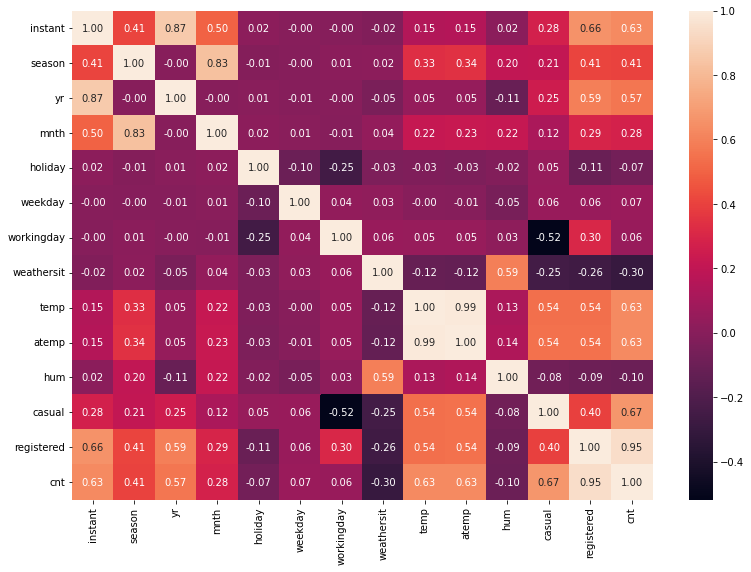

In [146]:
# heatmap para analisar correlação, qto mais prox de 1.0 maior é a covariância
plt.figure(figsize=(13,9))
sns.heatmap(df_day.corr(), annot=True, fmt='.2f')
plt.show()

A correlação entre 'instant' e 'registered' mostra que o número de corridas aumentou de um ano para o próximo.

Possivelmente temos um  dataset desbalanceado

<Figure size 1440x1080 with 0 Axes>

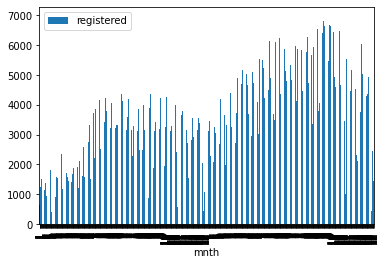

In [147]:
plt.figure(figsize=(20,15))
df_day.plot.bar(y='registered', x='mnth')

<Figure size 1440x1080 with 0 Axes>

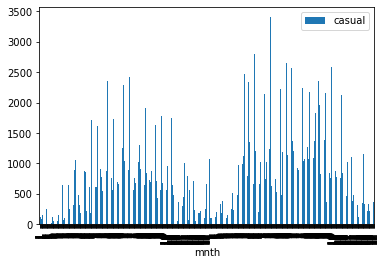

In [148]:
plt.figure(figsize=(20,15))
df_day.plot.bar(y='casual', x='mnth')

In [149]:
df_day.groupby('yr')['registered'].sum()

yr
0     995851
1    1676811
Name: registered, dtype: int64

In [150]:
df_day.groupby('yr')['casual'].sum()

yr
0    247252
1    372765
Name: casual, dtype: int64

In [151]:
# tipifica as colunas categóricas
cat_col = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for col in cat_col: 
  df_day[col] = df_day[col].astype('category')

In [152]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    category
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  casual      731 non-null    int64   
 13  registered  731 non-null    int64   
 14  cnt         731 non-null    int64   
dtypes: category(7), float64(3), int64(4), object(1)
memory usage: 52.2+ KB


In [153]:
df_day.describe()

,instant,temp,atemp,hum,casual,registered,cnt
count,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,20.31,23.72,0.63,848.18,3656.17,4504.35
std,211.17,7.51,8.15,0.14,686.62,1560.26,1937.21
min,1.00,2.42,3.95,0.00,2.00,20.00,22.00
25%,183.50,13.82,16.89,0.52,315.50,2497.00,3152.00
50%,366.00,20.43,24.34,0.63,713.00,3662.00,4548.00
75%,548.50,26.88,30.43,0.73,1096.00,4776.50,5956.00
max,731.00,35.33,42.04,0.97,3410.00,6946.00,8714.00


# Univariate Analysis

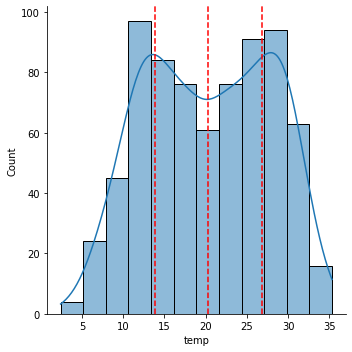

In [154]:
# variável temperatura (maior correlação com 'cnt')
sns.displot(x="temp", data=df_day, kde=True)
description = df_day['temp'].describe()
plt.axvline(description["25%"], ls="--", color='r')
plt.axvline(description["mean"], ls="--", color='r')
plt.axvline(description["75%"], ls="--", color='r')

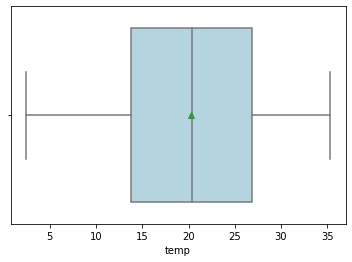

In [155]:
sns.boxplot(df_day['temp'], showmeans=True, color='lightblue');

In [156]:
# verifica outliers, método 3sigma
temp_upl = df_day['temp'].mean() + 3*df_day['temp'].std()
temp_lwl = df_day['temp'].mean() - 3*df_day['temp'].std()
print(
    "Upper limit", temp_upl,
    "\nLower limit", temp_lwl
    )

Upper limit 42.82635151761136 
Lower limit -2.2047099307440945


In [157]:
# retorna os outliers do dataframe
df_day[(df_day['temp'] > temp_upl) | (df_day['temp'] < temp_lwl)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt


Não há outliers na distruição de temperatura

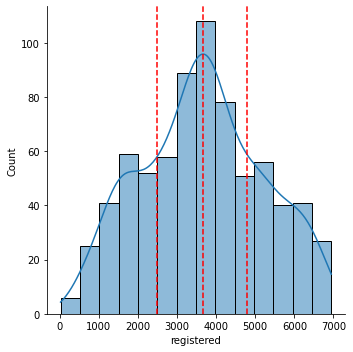

In [158]:
# variável registered
sns.displot(x="registered", data=df_day, kde=True)
description = df_day['registered'].describe()
plt.axvline(description["25%"], ls="--", color='r')
plt.axvline(description["mean"], ls="--", color='r')
plt.axvline(description["75%"], ls="--", color='r')

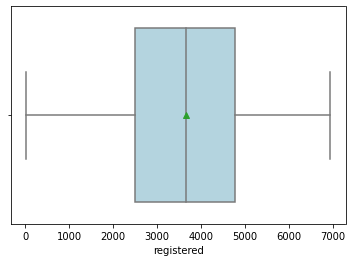

In [159]:
sns.boxplot(df_day['registered'], showmeans=True, color='lightblue');

In [160]:
# verifica outliers, método 3sigma
registered_upl = df_day['registered'].mean() + 3*df_day['registered'].std()
registered_lwl = df_day['registered'].mean() - 3*df_day['registered'].std()
print(
    "Upper limit", registered_upl,
    "\nLower limit", registered_lwl
    )

Upper limit 8336.941497679425 
Lower limit -1024.5967644372909


In [161]:
# retorna os outliers do dataframe
df_day[(df_day['registered'] > registered_upl) | (df_day['registered'] < registered_lwl)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt


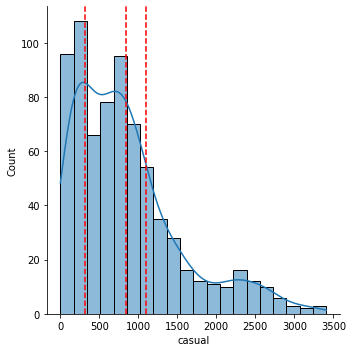

In [162]:
# variável casual
sns.displot(x="casual", data=df_day, kde=True)
description = df_day['casual'].describe()
plt.axvline(description["25%"], ls="--", color='r')
plt.axvline(description["mean"], ls="--", color='r')
plt.axvline(description["75%"], ls="--", color='r')

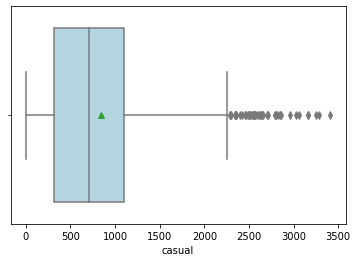

In [163]:
sns.boxplot(df_day['casual'], showmeans=True, color='lightblue');

In [164]:
# verifica outliers, método 3sigma
casual_upl = df_day['casual'].mean() + 3*df_day['casual'].std()
casual_lwl = df_day['casual'].mean() - 3*df_day['casual'].std()
print(
    "Upper limit", casual_upl,
    "\nLower limit", casual_lwl
    )

Upper limit 2908.0439354421997 
Lower limit -1211.6909942657294


In [165]:
# retorna os outliers do dataframe
outliers = list(df_day[(df_day['casual'] > casual_upl) | (df_day['casual'] < casual_lwl)].index)
outliers

[184, 441, 462, 504, 512, 532, 623, 644]

In [166]:
# dataframe de saída da análise univariada
df_un = df_day.drop(index=outliers)

In [167]:
df_un.shape

(723, 15)

In [198]:
df_un.skew(numeric_only=True).sort_values(ascending=False)

casual        1.14
registered    0.05
instant       0.01
temp         -0.04
cnt          -0.05
hum          -0.06
atemp        -0.12
dtype: float64

# Bivariate Analysis

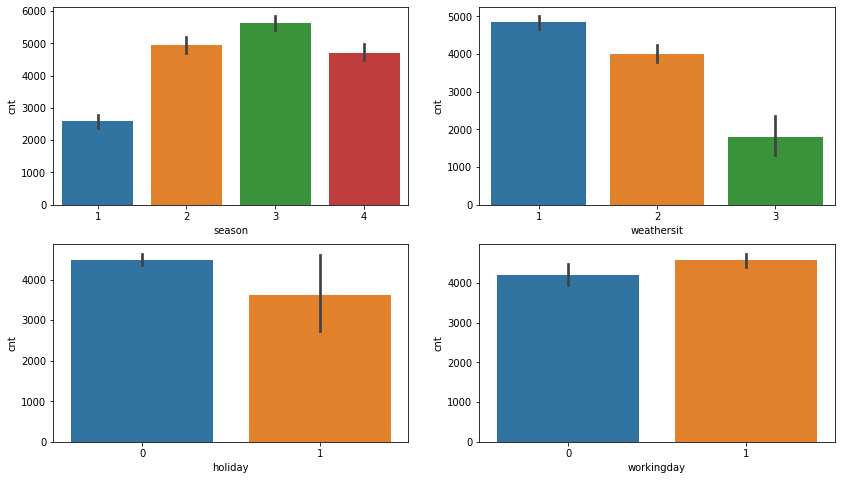

In [169]:
fig, ax = plt.subplots(2,2, figsize = (14,8))
sns.barplot(x= 'season', y='cnt', data = df_un, ax = ax[0][0])
sns.barplot(x= 'weathersit', y='cnt', data = df_un, ax = ax[0][1])
sns.barplot(x= 'holiday', y='cnt', data = df_un, ax = ax[1][0])
sns.barplot(x= 'workingday', y='cnt', data = df_un, ax = ax[1][1])

- season (1:springer, 2:summer, 3:fall, 4:winter): maior número de viajens totais na primavera
- weathersit: maior número de viajens totais com céu claro; não houve registro de dia tipo 4
        - 1: Clear, Few clouds, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

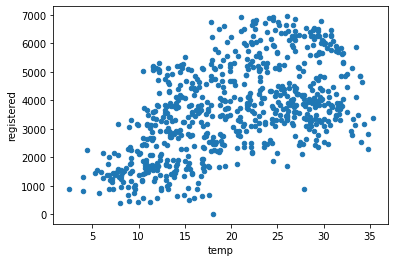

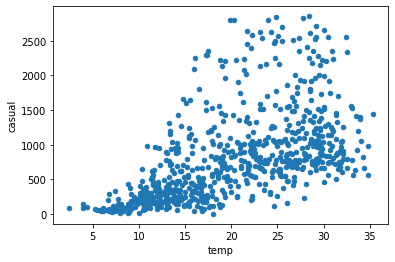

In [170]:
df_un.plot.scatter('temp','registered')
df_un.plot.scatter('temp','casual')

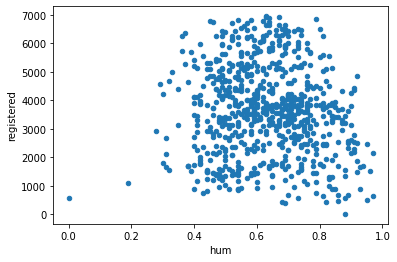

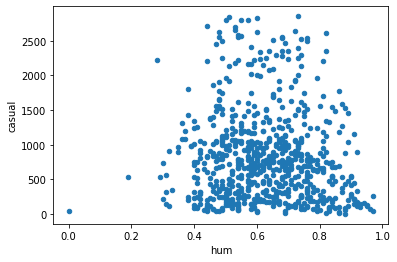

In [171]:
df_un.plot.scatter('hum','registered')
df_un.plot.scatter('hum','casual')

In [172]:
# histograma das corridas por dia da semana
weekday_histReg = df_un.groupby('weekday')['registered'].sum()
weekday_histCas = df_un.groupby('weekday')['casual'].sum()

weekday
0    300198
1    381741
2    411266
3    415729
4    423935
5    409552
6    295558
Name: registered, dtype: int64


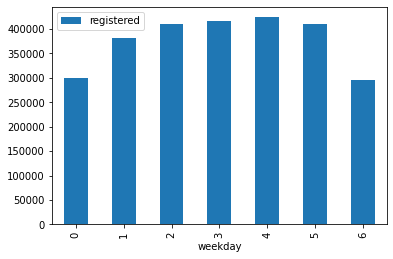

In [173]:
print(weekday_histReg)
weekday_histReg.plot.bar(y='registered').legend()

weekday
0    137238
1     67719
2     57843
3     57319
4     61460
5     78238
6    134881
Name: casual, dtype: int64


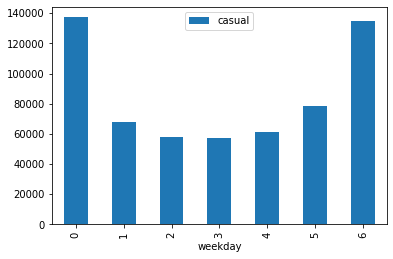

In [174]:
print(weekday_histCas)
weekday_histCas.plot.bar(y='casual').legend()

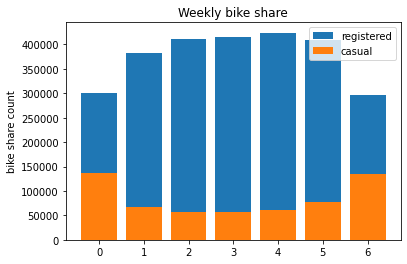

In [175]:
label = list(set(df_un['weekday']))

fig, ax = plt.subplots()

ax.bar(label, weekday_histReg, label='registered')
ax.bar(label, weekday_histCas, label='casual')

ax.set_title('Weekly bike share')
ax.set_ylabel('bike share count')
ax.legend()

As corridas casuais ocorrem com maior frequência aos finais de semana,
enquanto as registradas nos dias úteis 1-5. A análise de predição será separada em 2 grupos com os targets 'registered' e 'casual'

Há 2 pontos de humidade notadamente outliers em 0 e 20%; devem ser removidos dos dados

In [176]:
# drop dos outliers visuais, exclusão de linha
df_un['hum'].sort_values().head()

68    0.00
49    0.19
463   0.28
451   0.29
86    0.30
Name: hum, dtype: float64

In [177]:
# dataframe de saída da análise bivariada
df_bi = df_un.drop(index=[68,49])

In [178]:
df_bi.shape

(721, 15)

# Multivariate Analysis

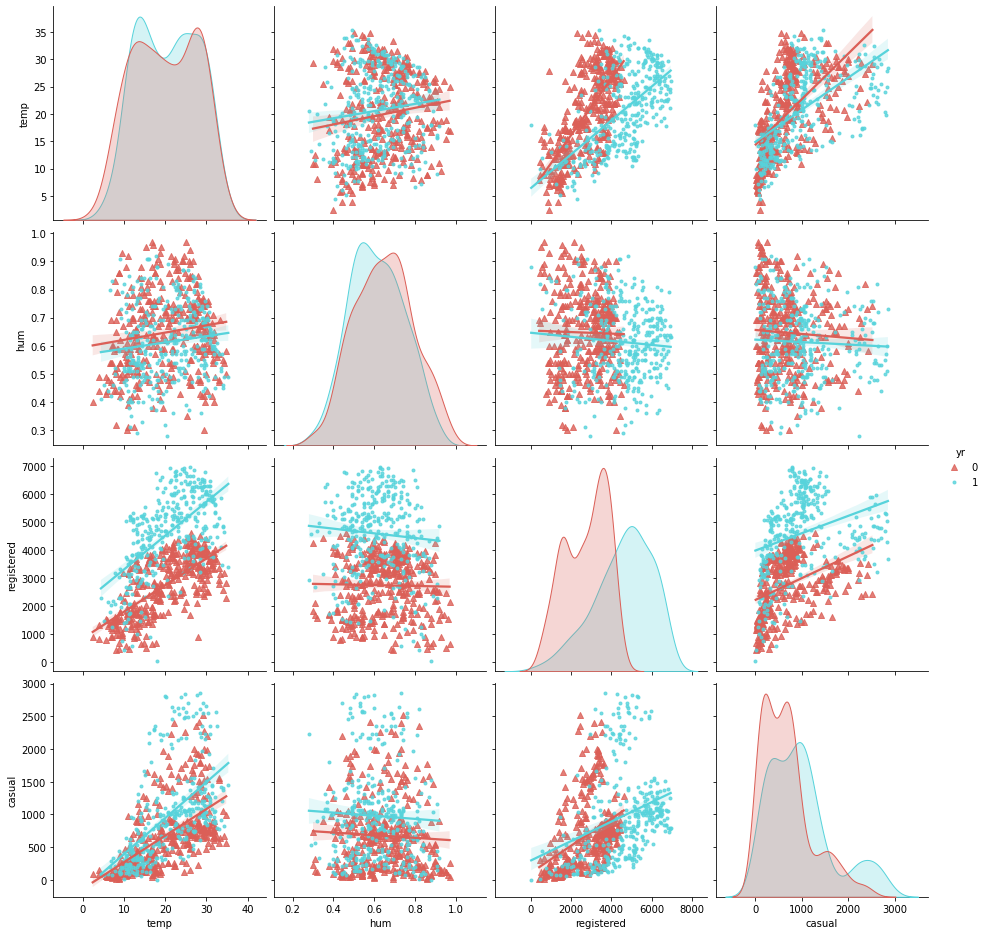

In [179]:
sns.pairplot(data=df_bi, vars=['temp','hum','registered','casual'], \
             hue='yr', kind='reg', diag_kind='kde', markers=['^','.'], height=3.3, palette='hls');

Novamente se observa a grande variação do registered x temp, por ano

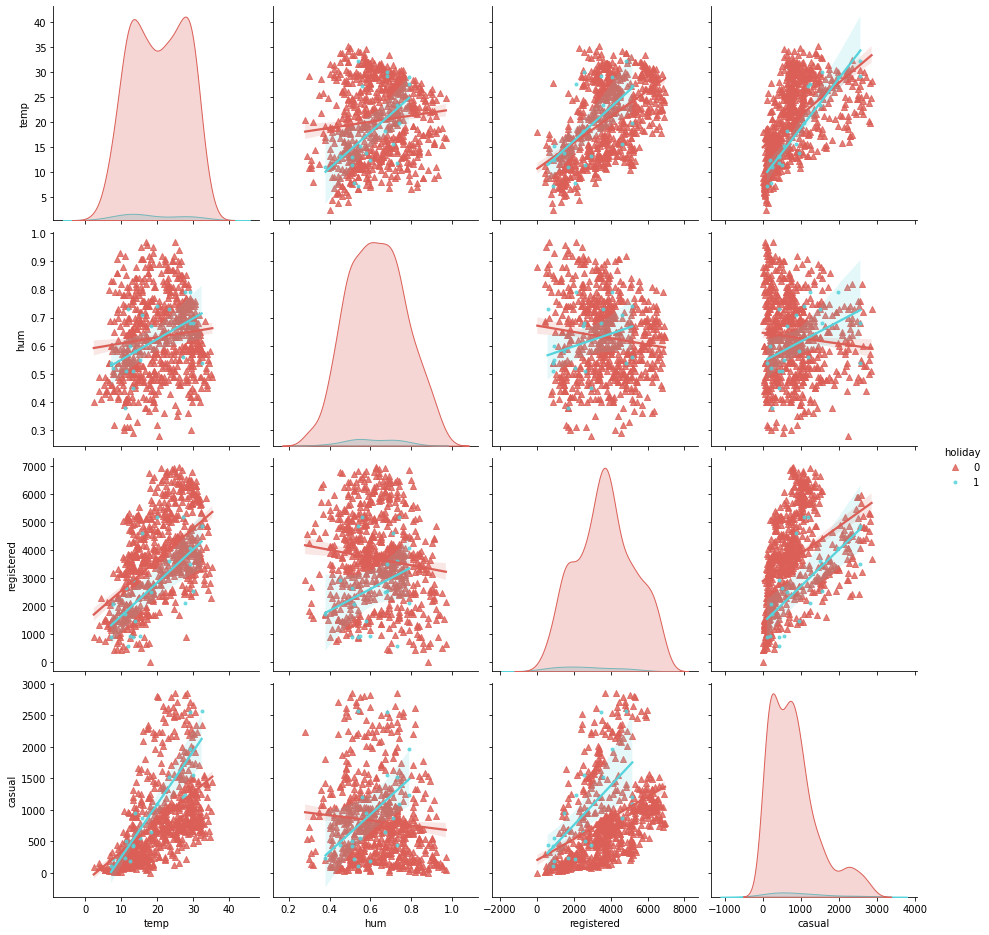

In [180]:
sns.pairplot(data=df_bi, vars=['temp','hum','registered','casual'], \
             hue='holiday', kind='reg', diag_kind='kde', markers=['^','.'], height=3.3, palette='hls');

In [181]:
# dataframe de saída da análise multivariada
df_mult = df_bi

# Model preparation

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [183]:
# as seguintes colunas não são de interesse para o modelo
df = df_mult.drop(columns=['instant','dteday','yr','atemp','cnt'], axis=1)

In [184]:
df.dtypes

season        category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
hum            float64
casual           int64
registered       int64
dtype: object

In [185]:
# dummy enconding method (k-1 variáveis dummy)
# NOT one-hot-encode method (k variáveis dummy)
# k-1 dummies: drop_first=True

cols = ['season','mnth','weekday','weathersit','workingday','holiday']
df = pd.get_dummies(df, columns=cols, drop_first=True)

In [186]:
df.shape

(721, 28)

In [187]:
#!pip install smogn

In [188]:
'''
documentação smogn:
https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_2_int.ipynb

Realiza um over-sampling dos minoritátios em registered para melhor balanceamento
do dataset, no qual ouve aumento ~70% entre os anos 0 e 1
'''
import smogn
df_model = smogn.smoter(
                data=df,
                y='registered',
                k=5,
                samp_method='extreme',
                rel_thres=0.7,
                rel_method='auto',
                rel_xtrm_type='high',
                rel_coef=0.7
            )

r_index: 100%|##########| 45/45 [00:00<00:00, 328.22it/s]


In [189]:
df_model.head()

,temp,hum,casual,registered,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,workingday_1,holiday_1
0,25.76,0.67,751,7409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,26.66,0.54,797,7295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,26.00,0.66,753,7409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,30.47,0.61,790,5012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,31.96,0.46,921,8890,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [190]:
df_model.shape

(1097, 28)

In [191]:
X = df_model.drop(['registered', 'casual'], axis=1)
y1 = df_model['registered']
y2 = df_model['casual']

X.shape, y1.shape, y2.shape

((1097, 26), (1097,), (1097,))

In [192]:
# REGISTERED
# prepara as variaveis (X,y1) para o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3)
X_train.shape

(767, 26)

In [193]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
pred_reg = regr.predict(X_test)

print(
    'Test R2 SCORE:', r2_score(y_test, pred_reg).round(3),
    '\nTest RMSE:', np.sqrt(mean_squared_error(y_test, pred_reg)).round(3),
    '\nTest MAE:', mean_absolute_error(y_test, pred_reg).round(3),
    )

Test R2 SCORE: 0.633 
Test RMSE: 1483.238 
Test MAE: 1177.678


In [194]:
# CASUAL
# prepara as variaveis (X,y2) para o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3)
X_train.shape

(767, 26)

In [195]:
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor(bootstrap=True, random_state=2).fit(X_train, y_train)
reg.score(X_test, y_test)

0.8434562143429458

In [196]:
reg.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [197]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
pred_reg = regr.predict(X_test)

print(
    'Test R2 SCORE:', r2_score(y_test, pred_reg).round(3),
    '\nTest RMSE:', np.sqrt(mean_squared_error(y_test, pred_reg)).round(3),
    '\nTest MAE:', mean_absolute_error(y_test, pred_reg).round(3),
    )

Test R2 SCORE: 0.831 
Test RMSE: 260.853 
Test MAE: 166.886


# Comentários finais

Os dados do dataset apresentam qualidade na coleta, possuei poucos outliers, nenhum valor null/na.

Outros regressores foram testados mas não apresentados para não poluir este notebook (eg. GradientBoostingRegressor).

Problemas encontrados:
- Falta da unidade física da velocidade do vento, ainda que seja possível inferir.
- Valor máximo da temperatura utilizado para normalização não é verificado no dataset, sendo possivelmente um subset de uma base de dados mais ampla.

Pontos de melhoria:
- Fazer um fine tuning dos parâmetros de over-sampling do SMOTE, ao mesmo tempo tentando evitar o overfitting.
- A grande variação de corridas entre os dois anos dificulta a capacidade de predição do(s) modelo(s). Seriam necessários mais dados de outros anos.